## KNN

We will now use the KNN model for my dataset because...

In [11]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, f1_score
import pydotplus

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler




In [12]:
#Import the data
df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:

def minkowski_distance(a, b, p=2):
    """
    Compute the Minkowski distance between two arrays.

    Args:
        a (np.ndarray): First array.
        b (np.ndarray): Second array.
        p (int, optional): The degree of the Minkowski distance. Defaults to 2 (Euclidean distance).

    Returns:
        float: Minkowski distance between arrays a and b.
    """

    # TODO
    return (pow(sum(pow(abs(x-y), p)
            for x, y in zip(a, b)), 1/p))

In [14]:
class knn:
    def __init__(self):
        self.k = None
        self.p = None
        self.x_train = None
        self.y_train = None

    def fit(self, X_train: np.ndarray, y_train: np.ndarray, k: int = 5, p: int = 2):
        """
        Fit the model using X as training data and y as target values.

        You should check that all the arguments shall have valid values:
            X and y have the same number of rows.
            k is a positive integer.
            p is a positive integer.

        Args:
            X_train (np.ndarray): Training data.
            y_train (np.ndarray): Target values.
            k (int, optional): Number of neighbors to use. Defaults to 5.
            p (int, optional): The degree of the Minkowski distance. Defaults to 2.
        """
        # TODO
        if(X_train.shape[0] != y_train.shape[0]):
            raise ValueError("X and y must have the same number of rows")
        if k <= 0:
            raise ValueError("k must be a positive integer")
        if p <= 0:
            raise ValueError("p must be a positive integer")
        
        self.k = k
        self.p = p
        self.x_train = X_train
        self.y_train = y_train

        

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class labels for the provided data.

        Args:
            X (np.ndarray): data samples to predict their labels.

        Returns:
            np.ndarray: Predicted class labels.
        """
        # TODO
        results = []
        for x in X:
            distance = self.compute_distances(x)
            nearest = self.get_k_nearest_neighbors(distance)
            label = self.y_train.iloc[nearest]
            results.append(self.most_common_label(label))
        return np.array(results)

    def predict_proba(self, X):
        """
        Predict the class probabilities for the provided data.

        Each class probability is the amount of each label from the k nearest neighbors
        divided by k.

        Args:
            X (np.ndarray): data samples to predict their labels.

        Returns:
            np.ndarray: Predicted class probabilities.
        """
        # TODO
        results = []
        for x in X:
            distance = self.compute_distances(x)
            nearest = self.get_k_nearest_neighbors(distance)
            label = self.y_train.iloc[nearest] 
            probs = np.bincount(label, minlength=2)
            results.append([probs[0]/ self.k, probs[1]/ self.k])
        return np.array(results)
        


    def compute_distances(self, point: np.ndarray) -> np.ndarray:
        """Compute distance from a point to every point in the training dataset

        Args:
            point (np.ndarray): data sample.

        Returns:
            np.ndarray: distance from point to each point in the training dataset.
        """
        # TODO
        results = []
        for x in self.x_train:
            distance = minkowski_distance(point, x, self.p)
            results.append(distance)
        return np.array(results)




    def get_k_nearest_neighbors(self, distances: np.ndarray) -> np.ndarray:
        """Get the k nearest neighbors indices given the distances matrix from a point.

        Args:
            distances (np.ndarray): distances matrix from a point whose neighbors want to be identified.

        Returns:
            np.ndarray: row indices from the k nearest neighbors.

        Hint:
            You might want to check the np.argsort function.
        """
        # TODO
        return np.array(np.argsort(distances)[:self.k])

    def most_common_label(self, knn_labels: np.ndarray) -> int:
        """Obtain the most common label from the labels of the k nearest neighbors

        Args:
            knn_labels (np.ndarray): labels from the k nearest neighbors

        Returns:
            int: most common label
        """
        # TODO
        return np.bincount(knn_labels).argmax()

    def __str__(self):
        """
        String representation of the kNN model.
        """
        return f"kNN model (k={self.k}, p={self.p})"


In [15]:
#INPUTS_KNN = input_vars

# Define hyperparameters of the model
k = 25 # Number of nearest neighbors
p = 2 # Order of Minkowski distance (what distance is this?)

# Create a model object
knn_fit = knn()
print(knn_fit)

kNN model (k=None, p=None)


In [16]:
# Train model
knn_fit.fit(X_train_scaled, y_train, k=k, p=p)
print("kNN Trained")
print(knn_fit)

kNN Trained
kNN model (k=25, p=2)


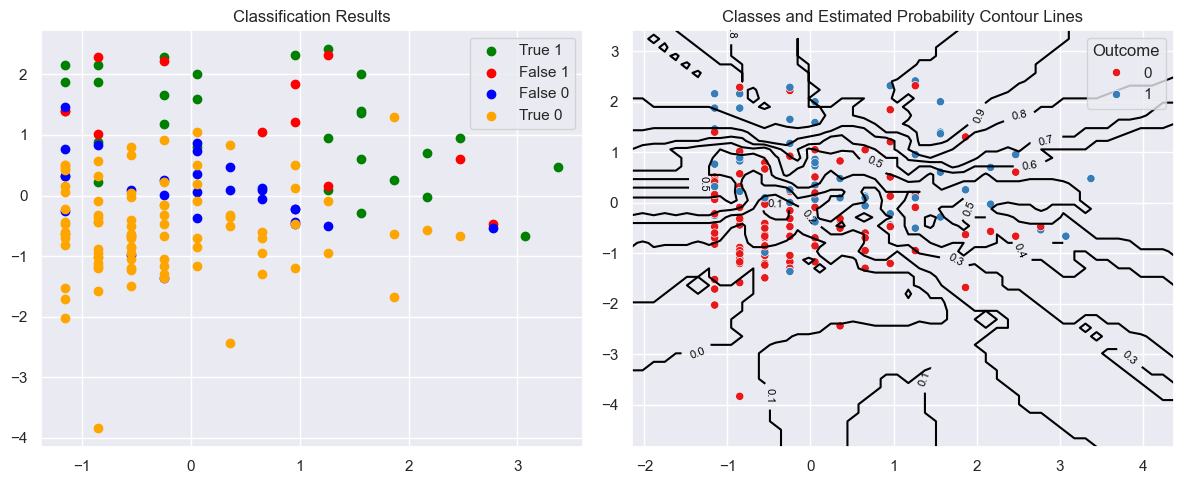

In [17]:
from matplotlib.colors import ListedColormap
import seaborn as sns

def plot_2Dmodel_predictions(X, y, model, grid_points_n):
    """
    Plot the classification results and predicted probabilities of a model on a 2D grid.

    This function creates two plots:
    1. A classification results plot showing True Positives, False Positives, False Negatives, and True Negatives.
    2. A predicted probabilities plot showing the probability predictions with level curves for each 0.1 increment.

    Args:
        X (np.ndarray): The input data, a 2D array of shape (n_samples, 2), where each row represents a sample and each column represents a feature.
        y (np.ndarray): The true labels, a 1D array of length n_samples.
        model (classifier): A trained classification model with 'predict' and 'predict_proba' methods. The model should be compatible with the input data 'X'.
        grid_points_n (int): The number of points in the grid along each axis. This determines the resolution of the plots.

    Returns:
        None: This function does not return any value. It displays two plots.

    Note:
        - This function assumes binary classification and that the model's 'predict_proba' method returns probabilities for the positive class in the second column.
    """
    # Map string labels to numeric

    unique_labels = np.unique(y)
    num_to_label = {i: label for i, label in enumerate(unique_labels)}

    # Predict on input data
    preds = model.predict(X)

    # Determine TP, FP, FN, TN
    tp = (y == unique_labels[1]) & (preds == unique_labels[1])
    fp = (y == unique_labels[0]) & (preds == unique_labels[1])
    fn = (y == unique_labels[1]) & (preds == unique_labels[0])
    tn = (y == unique_labels[0]) & (preds == unique_labels[0])

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Classification Results Plot
    ax[0].scatter(X[tp, 0], X[tp, 1], color='green', label=f'True {num_to_label[1]}')
    ax[0].scatter(X[fp, 0], X[fp, 1], color='red', label=f'False {num_to_label[1]}')
    ax[0].scatter(X[fn, 0], X[fn, 1], color='blue', label=f'False {num_to_label[0]}')
    ax[0].scatter(X[tn, 0], X[tn, 1], color='orange', label=f'True {num_to_label[0]}')
    ax[0].set_title('Classification Results')
    ax[0].legend()

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_points_n),
                         np.linspace(y_min, y_max, grid_points_n))

    # # Predict on mesh grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Use Seaborn for the scatter plot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', ax=ax[1])
    ax[1].set_title('Classes and Estimated Probability Contour Lines')

    # Plot contour lines for probabilities
    cnt = ax[1].contour(xx, yy, probs, levels=np.arange(0, 1.1, 0.1), colors='black')
    ax[1].clabel(cnt, inline=True, fontsize=8)

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_2Dmodel_predictions(X_test_scaled, y_test, knn_fit, 50)